In [1]:
#!import "setup.ipynb"

using PdfLexer.Writing;


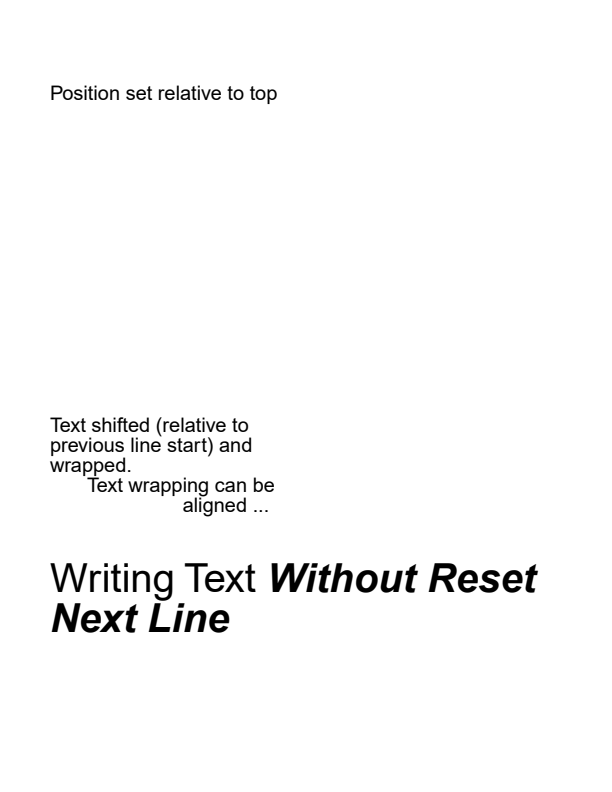

In [2]:
{
    using var doc = PdfDocument.Create();
    var pg = doc.AddPage();
    {
        using var writer = pg.GetWriter();
        writer
            .Font(Base14.Helvetica, 40)
            .TextShift(50, 200)
            .Text("Writing Text ")
            .Font(Base14.HelveticaBoldItalic, 40)
            .Text("Without Reset")
            .NewLine()
            .Text("Next Line")
            .Font(Base14.Helvetica, 20)
            .TextShift(0, 200)
            .TextWrap("Text shifted (relative to previous line start) and wrapped.", 225)
            .NewLine()
            .TextWrap("Text wrapping can be aligned ...", 225, TextAlign.Right)
            .TextMove(PdfPoint.Create(50.0, -100.0).NormalizeToTopLeft(pg))
            .Text("Position set relative to top");
    }

    display(pg);
}


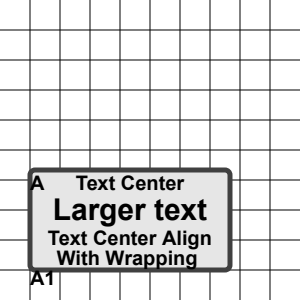

30 0 m
30 300 l
S
60 0 m
60 300 l
S
90 0 m
90 300 l
S
120 0 m
120 300 l
S
150 0 m
150 300 l
S
180 0 m
180 300 l
S
210 0 m
210 300 l
S
240 0 m
240 300 l
S
270 0 m
270 300 l
S
0 30 m
300 30 l
S
0 60 m
300 60 l
S
0 90 m
300 90 l
S
0 120 m
300 120 l
S
0 150 m
300 150 l
S
0 180 m
300 180 l
S
0 210 m
300 210 l
S
0 240 m
300 240 l
S
0 270 m
300 270 l
S
0.9 g
0.25 G
5 w
35 30 m
225 30 l
227.76142374915398 30 230 32.23857625084603 230 35 c
230 125 l
230 127.76142374915398 227.76142374915398 130 225 130 c
35 130 l
32.23857625084603 130 30 127.76142374915398 30 125 c
30 35 l
30 32.23857625084603 32.23857625084603 30 35 30 c
h
B*
0 g
/F1 20 Tf
20 TL
BT
1 0 0 1 30 55 Tm

[-898.0000078678131(T)60(e)15(xt)( )(Center)( )(Align)] TJ
T*
[-1333.4999978542328(With)( )(Wrapping)] TJ
T*
[(A1)] TJ
1 0 0 1 30 110 Tm

[-2287.0000064373016(T)60(e)15(xt)( )(Center)] TJ
/F1 30 Tf
30 TL
[] TJ
T*
[-759.3333419164021(Lar)15(g)-10(er)( )(te)15(xt)] TJ
/F1 20 Tf
20 TL
1 0 0 1 30 110 Tm
/F1 20 Tf
20 TL
[(A)] TJ
ET


In [3]:
{
    using var doc = PdfDocument.Create();
    var pg = doc.AddPage(300, 300);
    {
        using var writer = pg.GetWriter();
        var cp = pg.CropBox;
        var dx = cp.Width / 10.0;
        var dy = cp.Height / 10.0;

        for (var i = 1; i<10; i++) 
        {
            writer
                .MoveTo(dx*i, cp.LLy)
                .LineTo(dx*i, cp.URy)
                .Stroke();
        }

        for (var i = 1; i<10; i++) 
        {
            writer
                .MoveTo(cp.LLx, dy*i)
                .LineTo(cp.URx, dy*i)
                .Stroke();
        }

        var rect = new PdfRect<double> { LLx = dx,  LLy = dy, URx = 200+dx,  URy = dy + 100 };

        writer
            .SetFillGray(0.9)
            .SetStrokingGray(0.25)
            .LineWidth(5)
            .RoundedRect(dx, dy, 200, 100, 5)
            .FillAndStroke();

        writer
            .SetFillGray(0)
            .Font(Base14.HelveticaBold, 20)
            .TextMove(dx, dy+25)
            .TextWrapCenter("Text Center Align With Wrapping", 200);


        writer.Text("A1");

        writer.TextBox(rect, TextAlign.Center)
              .TextBoxWrite("Text Center")
              .TextBoxFont(Base14.TimesRomanBoldItalic, 30)
              .TextBoxWrite("Larger text")
              .TextBoxComplete();

        writer.Font(Base14.HelveticaBold, 20).Text("A");

    }

    display(pg);

    display(pg.DumpDecodedContents());
}